# PART 1

## PROJECT INTRODUCTION

## Project Description:
The study focuses on the number of flights in NL the months of Jan, Feb, March 2020 and its 
relationship/effect on the increase in the number of COVID Infections in NL.

## Data:
Three data sets that include flight data, country data and COVID data were used in this study. 
For the flight data, 100 flights per day for the 3 months months were obtained from the API call. 
The number of arrival and departure flights from Schiphol airport for KLM airlines were studied. 
The files that were obtained from the API call were in JSON format. These files were then converted into a dataframe. 

## Project Setup:
This project has 2 Jupyter notebooks. 
1. One notebook named Part 1 is to extract the data from the API and put them in JSON format.
2. Second notebook named Part 2 is the main notebook which has all the visualizations.


# Calling all the data from the API 

## (Note: Please do not run the cells as the API key wont work (the paid service only has access for specific number of days) 

This is the website where the data was obtained from: https://aviationstack.com/

This paid service provides you the airline routes with some limitation on the amount of data I can get.
The aviationstack API provides data about real-time flights. The API's flights endpoint is capable of looking up data about historical flights. In order to request data about one or more past flights, the flight_date parameter was attached to the API request URL and the dates were Jan 2020 - March 2020.

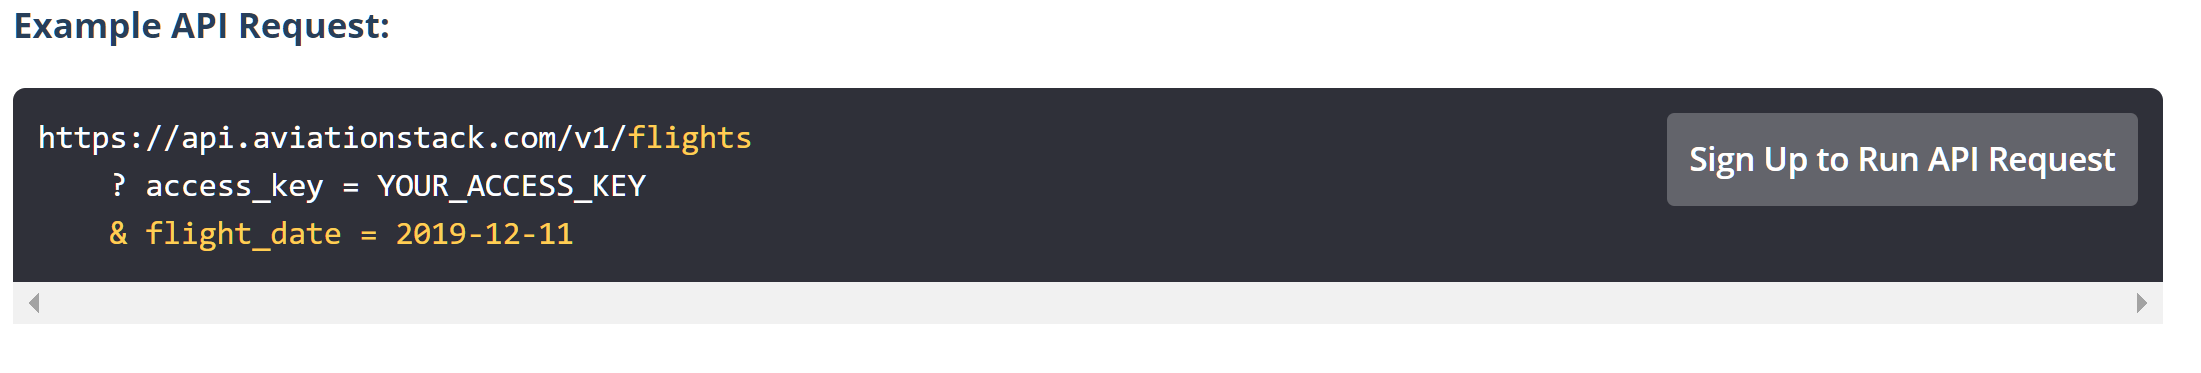

Since there is a lot of data available on flights from each airport, I limited the data collection only to one carrier, which is KLM, and one Airport, which is Schiphol.

Based on the Get Request parameters that is in aviationstack API documentation I requested the parameters I wanted for my project. 

# Declaring the Global Constants required for Aviation Stack API calls.

In [ ]:
ACCESS_KEY = '5549b7cfa9f1385105d5dc9de3673240'
AIRPORT ='AMS'
AIRLINE = 'KLM'
FLIGHT_URL = 'https://api.aviationstack.com/v1/flights'


# These are the folder locations for saving the API's JSON Response for Arrivals and Departures Data.
ARRIVAL_FOLDER_LOCATION = '../flight_data/2020/arr'
DEPARTURE_FOLDER_LOCATION = '../flight_data/2020/dep'

In [ ]:
import requests
import json
import datetime 

#method to get JSON response from AviationStack flights API
def get_flight_response(flight_url, flight_params):
    
    if flight_url is None or flight_params is None:
        raise ValueError("The values provided are not correct")
    else:
        api_result = requests.get(flight_url, flight_params) # response from AviationStack
        api_response = api_result.json()
        return api_response
    
#method to make the call to aviationstack historical flights API and get the depatures response for one day, indicated by 
#dep_flight_date
def get_dep_flight_response(dep_flight_date):
    if dep_flight_date is None:
        raise ValueError("Flight date value is not correct")
    else: 
        #construct params needed for the departure API call
        #http://api.aviationstack.com/v1/flights?access_key=5549b7cfa9f1385105d5dc9de3673240&flight_date=2020-01-01&dep_iata=AMS&airline_name=KLM

        departure_params = {'access_key': ACCESS_KEY, 'flight_date':dep_flight_date, 'dep_iata':AIRPORT, 'airline_name':AIRLINE}
        return get_flight_response(FLIGHT_URL, departure_params)
        
#method to make the call to aviationstack historical flights API and get the arrival response for one day, indicated by 
#arr_flight_date
def get_arr_flight_response(arr_flight_date):
    if arr_flight_date is None:
        raise ValueError("Flight date value is not correct")
    else: 
        #http://api.aviationstack.com/v1/flights?access_key=5549b7cfa9f1385105d5dc9de3673240&flight_date=2019-12-11&arr_iata=AMS&airline_name=KLM
        
        arrival_params = {'access_key': ACCESS_KEY, 'flight_date':arr_flight_date, 'arr_iata':AIRPORT, 'airline_name':AIRLINE}
        return get_flight_response(FLIGHT_URL, arrival_params)        
        
#save the  JSON response to a local file at flight_folder/flight_month/flight_date.json

def save_flight_json_file(flight_folder, flight_month, flight_date, flight_json):
    full_folder_path = flight_folder + '/' + flight_month + '/' + flight_date + '.json'
    with open(full_folder_path, 'w') as json_file: json.dump(flight_json, json_file)
    return

#main code starts here
# start date and end date
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime.now()        

from datetime import date, timedelta
#delta object to increment day by +1 during the loop
delta = timedelta(days=1) 

while start_date <= end_date:
    #get date in the format required for the API call
    current_date = start_date.strftime("%Y-%m-%d")
    
    #get month value since we want to store the json reponse by month in our data folder structure
    current_month = start_date.strftime("%m")
    
    print(current_date)
    print(current_month)
    
    #get the JSON response for departures for current_date eg:2020-01-01
    result = get_dep_flight_response(current_date)
    
    #save the departures JSON response to a local file at DEPARTURE_FOLDER_LOCATION/current_month/current_date.json
    save_flight_json_file(DEPARTURE_FOLDER_LOCATION, current_month, current_date, result)
    
    #get the JSON response for arrival for current_date eg:2020-01-01
    result = get_arr_flight_response(current_date)
    
    #save the arrival JSON response to a local file at ARRIVAL_FOLDER_LOCATION/current_month/current_date.json
    save_flight_json_file(ARRIVAL_FOLDER_LOCATION, current_month, current_date, result)
    
    #move date plus one day
    start_date += delta  
    
    